In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")



In [12]:
label_train = train["label"]
print(label_train)
# remove labels from the data
target_train = train.drop(labels=["label"], axis = 1)

#normalize the data
#CNN converg works faster on data bet-1 thanween 0 data between 0-255
target_train = target_train / 255.0
test = test / 255.0

#reshape image data in 3D(28 width and height)
target_train = target_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [13]:
#change one-hot encoding for label (3 = [0,0,0,1,0,0,0,0,0,0])
label_train = to_categorical(label_train, num_classes = 10)

In [14]:
#10% will be used for validation and the rest will be used to train the model
target_train, target_val, label_train, label_val = train_test_split(target_train, label_train, test_size = 0.1, random_state=2)

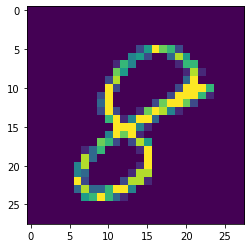

In [15]:
#example
g = plt.imshow(target_train[0][:,:,0])

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#combine features of Convolution layers.
model.add(Flatten())
#make artificial neural network with fully-connected dense layers.
model.add(Dense(256, activation = "relu")) 
#randomly selected neurons are ignored during training
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [17]:
model.compile(optimizer = RMSprop(lr=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(target_train, label_train, batch_size = 86, epochs = 3, validation_data = (target_val, label_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/3
 - 182s - loss: 0.2460 - accuracy: 0.9222 - val_loss: 0.0737 - val_accuracy: 0.9786
Epoch 2/3
 - 180s - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 3/3


In [ ]:
print(history.history["accuracy"])

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)